In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV,cross_val_score,KFold
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,StackingRegressor,AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
import lightgbm as lgb
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
import warnings 
warnings.filterwarnings('ignore')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/PGP AUG-20/Capstone project/outliersna.csv')
df.head()

,Unnamed: 0,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Type,Size,Weekly_Sales,markdown,Dep_type,Week
0,0,74.72,3.829,208.656470,7.274,0,2,128107,4738.88,0,2,30
1,1,45.96,2.989,211.333375,8.395,0,3,184109,16510.90,0,3,5
2,2,48.04,3.322,129.805194,10.148,0,3,158114,18170.01,0,5,44
3,3,57.78,2.764,136.627732,8.763,0,2,103681,27530.08,0,5,40
4,4,23.29,3.439,136.698129,4.377,0,3,155083,29865.70,1,3,1


In [ ]:
df = df.drop('Unnamed: 0',axis=1)

In [ ]:
print('Number of rows in the data set = {}\nNumber of columns in the data set = {}'.format(df.shape[0],df.shape[1]))

Number of rows in the data set = 384835
Number of columns in the data set = 11


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 384835 entries, 0 to 384834
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Temperature   384835 non-null  float64
 1   Fuel_Price    384835 non-null  float64
 2   CPI           384835 non-null  float64
 3   Unemployment  384835 non-null  float64
 4   IsHoliday     384835 non-null  int64  
 5   Type          384835 non-null  int64  
 6   Size          384835 non-null  int64  
 7   Weekly_Sales  384835 non-null  float64
 8   markdown      384835 non-null  int64  
 9   Dep_type      384835 non-null  int64  
 10  Week          384835 non-null  int64  
dtypes: float64(5), int64(6)
memory usage: 32.3 MB


In [ ]:
df.describe()

,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Type,Size,Weekly_Sales,markdown,Dep_type,Week
count,384835.000000,384835.000000,384835.000000,384835.000000,384835.000000,384835.000000,384835.000000,384835.000000,384835.000000,384835.000000,384835.000000
mean,60.064582,3.361042,171.292397,7.838971,0.070051,2.386815,133771.246584,10595.647917,0.358117,3.374677,25.762503
std,18.489801,0.459035,39.174194,1.504287,0.255233,0.668713,60991.583160,11349.700864,0.479447,1.291180,14.121031
min,5.280000,2.472000,126.064000,4.377000,0.000000,1.000000,34875.000000,0.010000,0.000000,1.000000,1.000000
25%,46.660000,2.932000,132.106200,6.885000,0.000000,2.000000,93188.000000,1794.050000,0.000000,2.000000,14.000000
50%,62.070000,3.452000,182.431557,7.866000,0.000000,2.000000,128107.000000,6422.580000,0.000000,3.000000,26.000000
75%,74.250000,3.738000,212.592862,8.595000,0.000000,3.000000,202307.000000,15867.210000,1.000000,5.000000,38.000000
max,100.140000,4.468000,227.232807,11.081000,1.000000,3.000000,219622.000000,47497.840000,1.000000,5.000000,52.000000


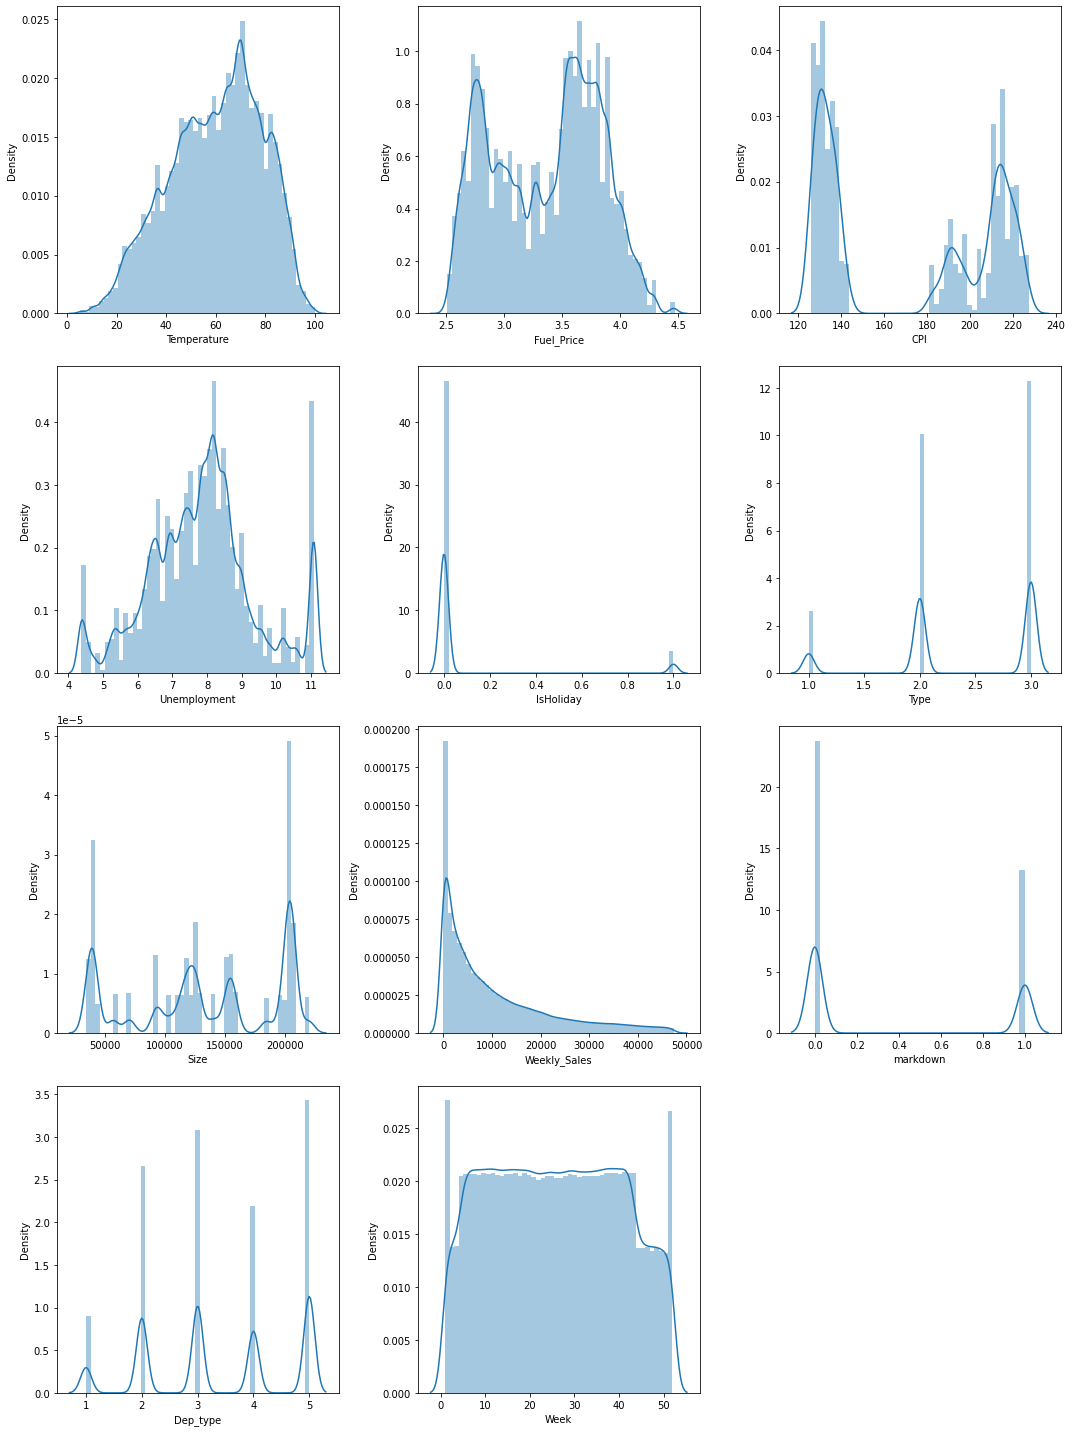

In [ ]:
plt.figure(figsize=(15,20))
for i,col in enumerate(df.columns,1):
  plt.subplot(4,3,i)
  sns.distplot(df[col])
  plt.tight_layout()

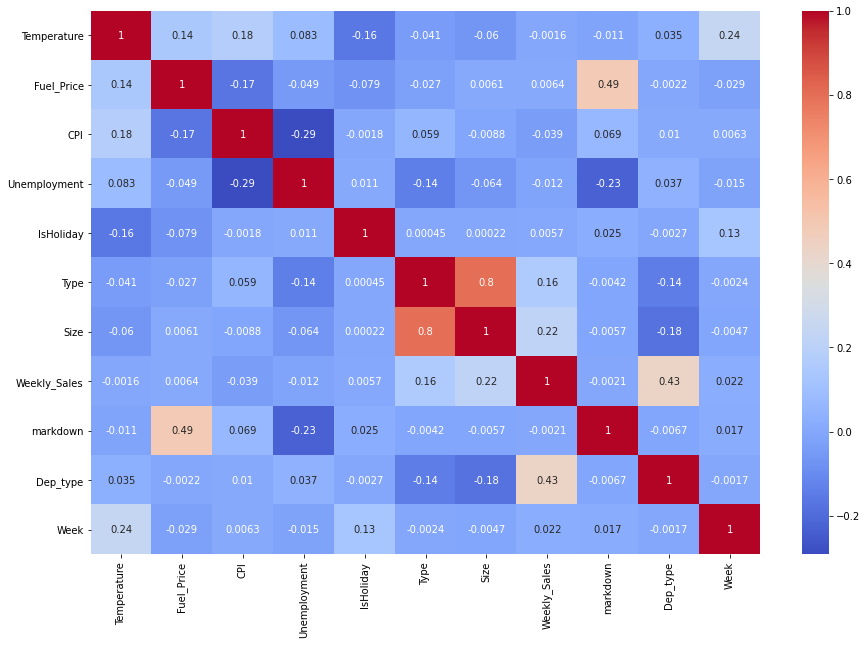

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')
plt.show()

**Inference: From the above graph we can see that there is a good correlation between Type and Size column so we can remove any one of the columns from the data set to remove mutlicollinearity**

In [ ]:
# removing Type column from the data set
df = df.drop('Type',axis=1)

# Checking and Treating the outliers in the data set in the numerical continuous columns

In [ ]:
df.columns

Index(['Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'IsHoliday', 'Size',
       'Weekly_Sales', 'markdown', 'Dep_type', 'Week'],
      dtype='object')

In [ ]:
num_col = ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment','Size','Weekly_Sales']

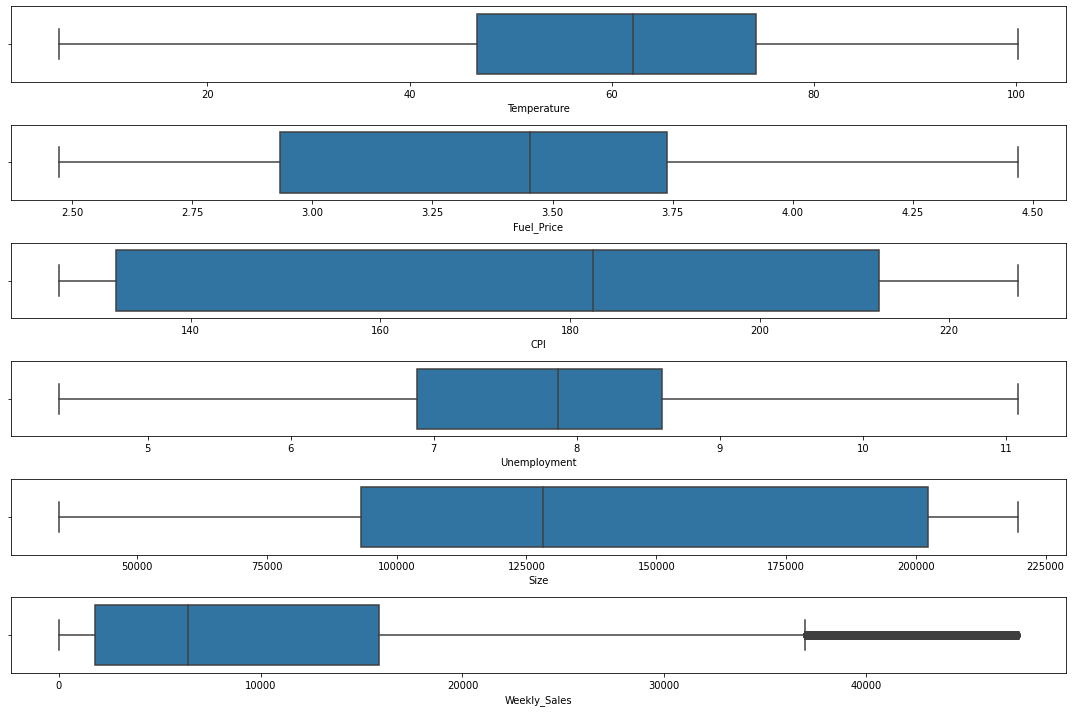

In [ ]:
plt.figure(figsize=(15,10))
for i,col in enumerate(num_col,1):
  plt.subplot(6,1,i)
  sns.boxplot(df[col])
  plt.tight_layout()

In [ ]:
df['Weekly_Sales'] = np.sqrt(df['Weekly_Sales'])

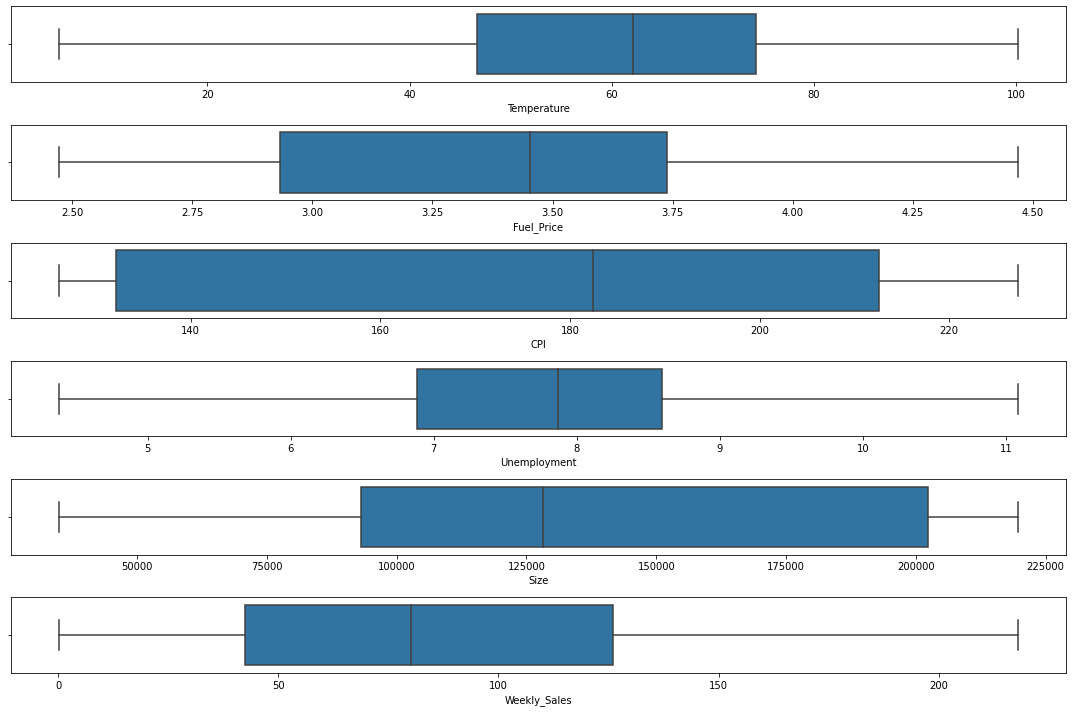

In [ ]:
plt.figure(figsize=(15,10))
for i,col in enumerate(num_col,1):
  plt.subplot(6,1,i)
  sns.boxplot(df[col])
  plt.tight_layout()

In [ ]:
import statsmodels.api as sm
x = df.drop('Weekly_Sales',axis=1)
y = df['Weekly_Sales']
xc = sm.add_constant(x)
model = sm.OLS(y,xc).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Weekly_Sales   R-squared:                       0.342
Model:                            OLS   Adj. R-squared:                  0.341
Method:                 Least Squares   F-statistic:                 2.218e+04
Date:                Sat, 17 Apr 2021   Prob (F-statistic):               0.00
Time:                        01:56:33   Log-Likelihood:            -2.0100e+06
No. Observations:              384835   AIC:                         4.020e+06
Df Residuals:                  384825   BIC:                         4.020e+06
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -11.2095      0.958    -11.705      0.000     -13.087      -9.332
Temperature     -0.0293      0.004     -6.713      0.000      -0.038      -0.021
Fuel_Price      -0.5159      0.192     -2.693      0.007      -0.891      -0.140
CPI             -0.0661      0.002    -32.131      0.000      -0.070      -0.062
Unemployment    -1.1595      0.052    -22.161      0.000      -1.262      -1.057
IsHoliday        0.3224      0.292      1.102      0.270      -0.251       0.896
Size             0.0003   1.21e-06    265.380      0.000       0.000       0.000
markdown        -0.2474      0.180     -1.371      0.170      -0.601       0.106
Dep_type        22.6531      0.057    397.572      0.000      22.541      22.765
Week             0.1013      0.005     18.738      0.000       0.091       0.112
==============================================================================
Omnibus:                    19646.779   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            22785.693
Skew:                           0.591   Prob(JB):                         0.00
Kurtosis:                       3.159   Cond. No.                     1.97e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.97e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
cols = list(xc.columns)
while(len(cols)>0):
  x1 = xc[cols]
  model = sm.OLS(y,x1).fit()
  pval = model.pvalues.drop('const')
  mx_pval = max(pval)
  mx_feat = pval.idxmax()
  if mx_pval>0.05:
    print(mx_feat,mx_pval)
    cols.remove(mx_feat)
  else:
    break

print(cols)

IsHoliday 0.27033760426262765
markdown 0.18890125455383636
['const', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Size', 'Dep_type', 'Week']


In [ ]:
xc_n = xc[cols]
model_n = sm.OLS(y,xc_n).fit()
model_n.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Weekly_Sales   R-squared:                       0.342
Model:                            OLS   Adj. R-squared:                  0.341
Method:                 Least Squares   F-statistic:                 2.851e+04
Date:                Sat, 17 Apr 2021   Prob (F-statistic):               0.00
Time:                        01:56:42   Log-Likelihood:            -2.0100e+06
No. Observations:              384835   AIC:                         4.020e+06
Df Residuals:                  384827   BIC:                         4.020e+06
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -10.8749      0.932    -11.665      0.000     -12.702      -9.048
Temperature     -0.0295      0.004     -6.927      0.000      -0.038      -0.021
Fuel_Price      -0.6559      0.165     -3.987      0.000      -0.978      -0.333
CPI             -0.0664      0.002    -32.606      0.000      -0.070      -0.062
Unemployment    -1.1449      0.051    -22.241      0.000      -1.246      -1.044
Size             0.0003   1.21e-06    265.525      0.000       0.000       0.000
Dep_type        22.6533      0.057    397.577      0.000      22.542      22.765
Week             0.1018      0.005     19.164      0.000       0.091       0.112
==============================================================================
Omnibus:                    19643.619   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            22781.544
Skew:                           0.591   Prob(JB):                         0.00
Kurtosis:                       3.159   Cond. No.                     1.91e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.91e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
resids = model_n.resid

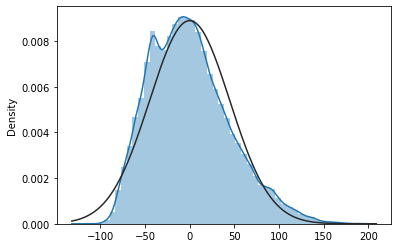

In [ ]:
import scipy.stats as st
sns.distplot(resids,fit=st.norm)

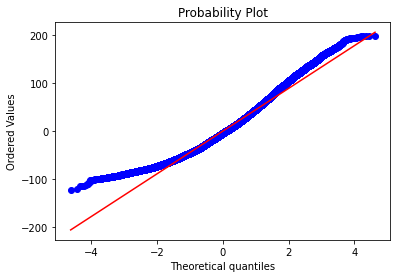

In [ ]:
st.probplot(resids,plot=plt)
plt.show()

**Taking the sample out of the data set**

In [ ]:
df_sample = df.sample(frac=0.1,random_state=10).reset_index(drop=True)

# Significance To prove that the sample taken represents the original dataset

**Test for normality**

    H0: The data is normal
    H1: The data is not normal

In [ ]:
# using shapiro test we will check the normality of the sample data set
for col in df_sample.columns:
  print(col)
  print()
  print('P-value = {}'.format(st.shapiro(df_sample[col])[1]))
  print('***'*40)

Temperature

P-value = 0.0
************************************************************************************************************************
Fuel_Price

P-value = 0.0
************************************************************************************************************************
CPI

P-value = 0.0
************************************************************************************************************************
Unemployment

P-value = 0.0
************************************************************************************************************************
IsHoliday

P-value = 0.0
************************************************************************************************************************
Size

P-value = 0.0
************************************************************************************************************************
Weekly_Sales

P-value = 0.0
*****************************************************************************************************

**Inference: From the above results we observe that the p-value < 0.05(alpha) which means we reject the null Hypothesis, that is the data is not normal. Thus, we will use non - parametric tests to compare the means of the original data set and the sample data set.**

**Mannwhitneyu Test**

    H0: The mean of the data in the column in the two samples are equal
    H1: The mean of the data in the column in the two columns are not equal

In [ ]:
for col in df.columns:
  print(col)
  print('P-value = {}'.format(st.mannwhitneyu(df[col],df_sample[col])[1]))
  print('***'*40)

Temperature
P-value = 0.11457624802609023
************************************************************************************************************************
Fuel_Price
P-value = 0.2015837275870231
************************************************************************************************************************
CPI
P-value = 0.10742411552821984
************************************************************************************************************************
Unemployment
P-value = 0.45638910381425024
************************************************************************************************************************
IsHoliday
P-value = 0.1809938226719614
************************************************************************************************************************
Size
P-value = 0.0917824621327426
************************************************************************************************************************
Weekly_Sales
P-value = 0.4520401560669502


**Inference: From the above results we can see that the p-value for all the columns > 0.05(alpha). Thus, the test fails to reject null Hypothesis, that is there is no significant difference between the means of the columns of the two datasets. Thus, we can say that the two datasets are similar.**

In [ ]:
x = df_sample.drop('Weekly_Sales',axis=1)
y = df_sample['Weekly_Sales']

In [ ]:
# splitting the data set into train and test
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [ ]:
def cross_val(algo,x=x,y=y):
  kf = KFold(n_splits=10,random_state=10,shuffle=True)
  score = cross_val_score(algo,x,y,cv=kf,scoring='r2',n_jobs=-1)
  return score

In [ ]:
def model_res(algo,x_train=x_train,x_test=x_test,y_train=y_train,y_test=y_test):
  if algo==lr:
    algo.fit(x_train,y_train)
    cof_df = pd.DataFrame(algo.coef_,index=x_train.columns,columns=['Coefs_lr'])
    print(cof_df)
    print()
    print('Intercept = {}'.format(algo.intercept_))
    print('***'*40)
    y_pred_train = algo.predict(x_train)
    y_pred_test = algo.predict(x_test)

    print('Evaluation of the model on Train data set')
    print('R-squared = {}'.format(r2_score(y_train,y_pred_train)))
    print('RMSE = {}'.format(np.sqrt(mean_squared_error(y_train,y_pred_train))))
    print('MAE = {}'.format(mean_absolute_error(y_train,y_pred_train)))
    print('***'*40)
    print('Evaluation of the model on Test data set')
    print('R-squared = {}'.format(r2_score(y_test,y_pred_test)))
    print('RMSE = {}'.format(np.sqrt(mean_squared_error(y_test,y_pred_test))))
    print('MAE = {}'.format(mean_absolute_error(y_test,y_pred_test)))
  else:
    algo.fit(x_train,y_train)
    feat_df = pd.DataFrame(algo.feature_importances_,index=x_train.columns,columns=['IMP']).sort_values('IMP',ascending=False)
    print(feat_df)
    print()
    y_pred_train = algo.predict(x_train)
    y_pred_test = algo.predict(x_test)

    print('Evaluation of the model on Train data set')
    print('R-squared = {}'.format(r2_score(y_train,y_pred_train)))
    print('RMSE = {}'.format(np.sqrt(mean_squared_error(y_train,y_pred_train))))
    print('MAE = {}'.format(mean_absolute_error(y_train,y_pred_train)))
    print('***'*40)
    print('Evaluation of the model on Test data set')
    print('R-squared = {}'.format(r2_score(y_test,y_pred_test)))
    print('RMSE = {}'.format(np.sqrt(mean_squared_error(y_test,y_pred_test))))
    print('MAE = {}'.format(mean_absolute_error(y_test,y_pred_test)))

In [ ]:
lr = LinearRegression()
dtr = DecisionTreeRegressor(random_state=10)
rfr = RandomForestRegressor(random_state=10,)
lgbr = lgb.LGBMRegressor(importance_type='split',random_state=10)

In [ ]:
cross_score_df = pd.DataFrame({'Linear Model':cross_val(lr),'Decision Tree':cross_val(dtr),'Random Forest':cross_val(rfr),'LightGBM':cross_val(lgbr)})

In [ ]:
cross_score_df

,Linear Model,Decision Tree,Random Forest,LightGBM
0,0.320652,-0.042696,0.219242,0.410387
1,0.345736,0.005633,0.251808,0.448061
2,0.347940,0.038632,0.275517,0.454402
3,0.318643,-0.039634,0.221156,0.415791
4,0.326049,-0.041555,0.215830,0.422402
5,0.350042,0.015818,0.256815,0.444461
6,0.355779,0.017700,0.253459,0.447407
7,0.355046,-0.013053,0.234000,0.445023
8,0.336261,-0.007061,0.233762,0.419038
9,0.348571,0.014091,0.251871,0.438650


Text(0, 0.5, 'Regression Algorithm')

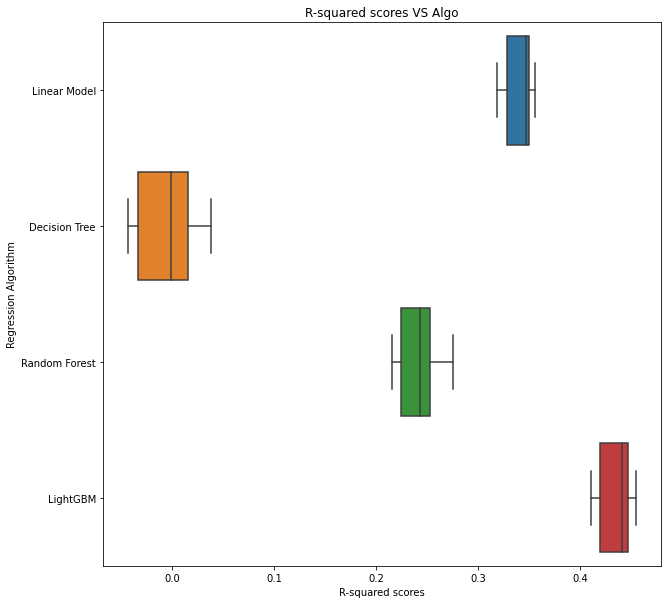

In [ ]:
plt.figure(figsize=(10,10))
sns.boxplot(data=cross_score_df,orient='h')
plt.xlabel('R-squared scores')
plt.title('R-squared scores VS Algo') 
plt.ylabel('Regression Algorithm')

In [ ]:
model_res(lr)

               Coefs_lr
Temperature   -0.026074
Fuel_Price    -1.017083
CPI           -0.059959
Unemployment  -1.184123
IsHoliday     -0.242056
Size           0.000321
markdown      -0.286445
Dep_type      22.966714
Week           0.108504

Intercept = -11.693145345458888
************************************************************************************************************************
Evaluation of the model on Train data set
R-squared = 0.34234135090115203
RMSE = 45.25899865098785
MAE = 36.131063223393454
************************************************************************************************************************
Evaluation of the model on Test data set
R-squared = 0.33786696341061095
RMSE = 44.952686301804626
MAE = 35.906834991762175


In [ ]:
model_res(dtr)

                   IMP
Dep_type      0.350663
Size          0.215796
Temperature   0.120557
Fuel_Price    0.097564
CPI           0.097370
Week          0.070851
Unemployment  0.038389
IsHoliday     0.004910
markdown      0.003901

Evaluation of the model on Train data set
R-squared = 0.7893441174545773
RMSE = 25.61482945290614
MAE = 15.333982949594906
************************************************************************************************************************
Evaluation of the model on Test data set
R-squared = -0.03405023757295522
RMSE = 56.176391705204765
MAE = 42.82557907790507


In [ ]:
model_res(rfr)

                   IMP
Dep_type      0.322518
Size          0.200140
Temperature   0.127519
CPI           0.105647
Fuel_Price    0.105645
Week          0.079397
Unemployment  0.049112
IsHoliday     0.005889
markdown      0.004132

Evaluation of the model on Train data set
R-squared = 0.7522038618007051
RMSE = 27.781260058611913
MAE = 20.401390462048077
************************************************************************************************************************
Evaluation of the model on Test data set
R-squared = 0.25941070239071795
RMSE = 47.541374839483964
MAE = 36.73678277641799


In [ ]:
model_res(lgbr)

              IMP
Size          593
Temperature   520
Fuel_Price    402
CPI           393
Week          378
Unemployment  360
Dep_type      322
IsHoliday      20
markdown       12

Evaluation of the model on Train data set
R-squared = 0.4812164783790518
RMSE = 40.19738111618361
MAE = 31.375677514375017
************************************************************************************************************************
Evaluation of the model on Test data set
R-squared = 0.43570836083120645
RMSE = 41.49873217364898
MAE = 32.42032088683661


# Hyperparameter Tuning

**Hyperparameter tuning for the Random Forest Regressor**

In [ ]:
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform

In [ ]:
df_sample.shape

(38484, 10)

In [ ]:
rfr = RandomForestRegressor(oob_score = True,random_state=10)
params = {'max_depth':sp_randint(2,15),
          'n_estimators':sp_randint(100,250),
          'max_features':sp_randint(2,9),
          'min_samples_leaf':sp_randint(380,1150),
          'min_samples_split':sp_randint(1140,3450)
          }
rsearch = RandomizedSearchCV(rfr,param_distributions=params,n_iter=50,scoring='r2',n_jobs=-1,cv=3,random_state=10)
rsearch.fit(x,y)


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [ ]:
# best_params=rsearch.best_params_
best_params = {'max_depth': 8,
 'max_features': 7,
 'min_samples_leaf': 612,
 'min_samples_split': 1784,
 'n_estimators': 119}

In [ ]:
rfr=RandomForestRegressor(**best_params,oob_score=True,random_state=10)
model_res(rfr)

                   IMP
Dep_type      0.675604
Size          0.316299
CPI           0.003356
Unemployment  0.001804
Temperature   0.001599
Week          0.000826
Fuel_Price    0.000455
markdown      0.000056
IsHoliday     0.000000

Evaluation of the model on Train data set
R-squared = 0.4057491298737643
RMSE = 43.02189996931897
MAE = 34.118921537606546
************************************************************************************************************************
Evaluation of the model on Test data set
R-squared = 0.4031258526835291
RMSE = 42.679999459766734
MAE = 33.92613989828755


**Hyperparameter tuning for Lightgbm regressor model**

In [ ]:
lgbmr_t = lgb.LGBMRegressor() 
params = {'n_estimators':sp_randint(100,250),
          'max_depth':sp_randint(2,15),
          'learning_rate':sp_uniform(0.1,1)}

rsearch = RandomizedSearchCV(lgbmr_t,param_distributions=params,cv=3,n_iter=50,scoring='r2',n_jobs=-1,random_state=10)
rsearch.fit(x,y)

RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=LGBMRegressor(boosting_type='gbdt',
                                           class_weight=None,
                                           colsample_bytree=1.0,
                                           importance_type='split',
                                           learning_rate=0.1, max_depth=-1,
                                           min_child_samples=20,
                                           min_child_weight=0.001,
                                           min_split_gain=0.0, n_estimators=100,
                                           n_jobs=-1, num_leaves=31,
                                           objective=None, random_state=None,
                                           reg_alpha=0.0, reg_lambda=0.0,
                                           silen...
                   param_distributions={'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f47ae41af90>,
       

In [ ]:
# best_params = rsearch.best_params_
best_params = {'learning_rate': 0.21464879919847205, 'max_depth': 3, 'n_estimators': 181}

In [ ]:
lgbmr = lgb.LGBMRegressor(**best_params,random_state=10,importance_type='split')
model_res(lgbmr)

              IMP
Size          262
Temperature   198
Fuel_Price    177
Unemployment  162
Dep_type      158
CPI           155
Week          102
IsHoliday       4
markdown        4

Evaluation of the model on Train data set
R-squared = 0.4551900949557468
RMSE = 41.19335554962231
MAE = 32.12618975718916
************************************************************************************************************************
Evaluation of the model on Test data set
R-squared = 0.4302928895428525
RMSE = 41.69738705043662
MAE = 32.614227971619925


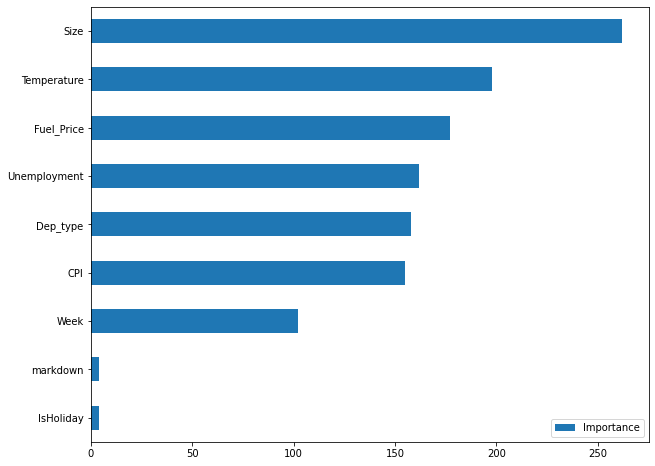

In [ ]:
pd.DataFrame(lgbmr.feature_importances_,index = x_train.columns,columns = ['Importance']).sort_values('Importance').plot(kind='barh',figsize=(10,8))

In [ ]:
y_week_sales = lgbmr.predict(x)

In [ ]:
df_sample['Weekly_Sales_pred'] = y_week_sales


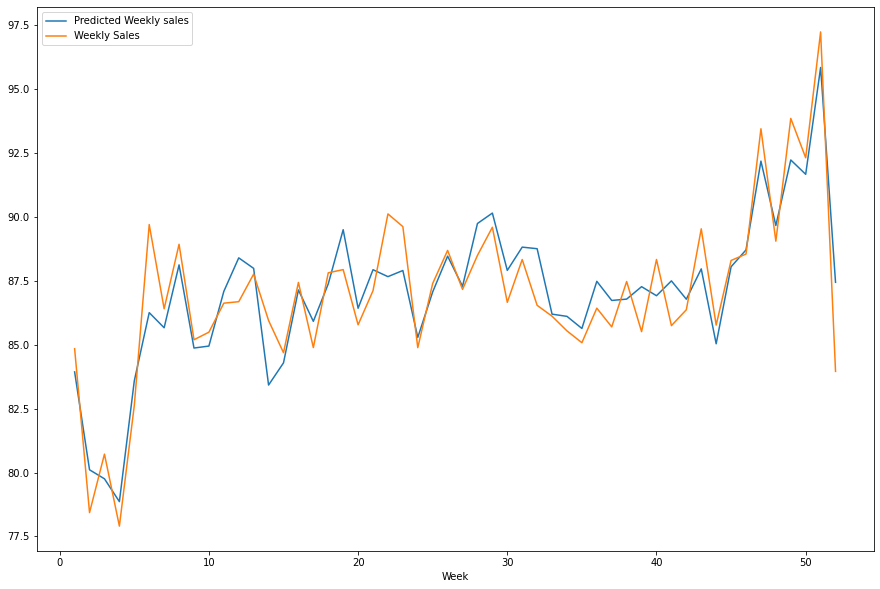

In [ ]:
plt.figure(figsize=(15,10))
df_sample['Weekly_Sales_pred'].groupby(df_sample['Week']).mean().plot(kind='line',label = 'Predicted Weekly sales')
df_sample['Weekly_Sales'].groupby(df_sample['Week']).mean().plot(kind='line',label = 'Weekly Sales')
plt.legend()
plt.show()

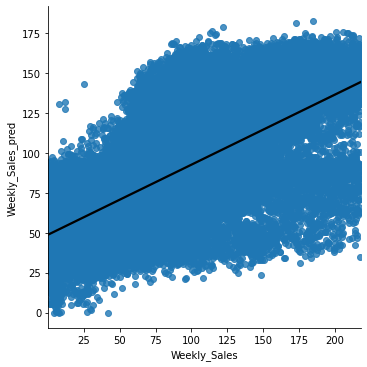

In [ ]:

sns.lmplot('Weekly_Sales','Weekly_Sales_pred',data=df_sample,line_kws={'color':'black'})

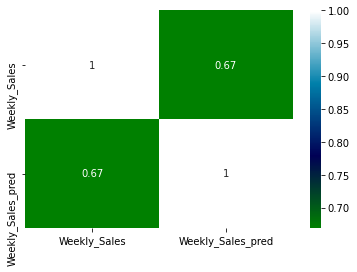

In [ ]:
sns.heatmap(df_sample[['Weekly_Sales','Weekly_Sales_pred']].corr(),annot=True,cmap='ocean')